In [ ]:
#Cleaned this page a bit
#Need to go back over 

In [3]:
#Import libraries

import pandas as pd
import numpy as np
from collections import Counter


In [4]:
#Import the data 

movie_df = pd.read_csv('/Users/markdetiberiis/MovieMonths/movie_df.csv')




In [5]:
movie_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year
0,0,0,0,tt0249516,Foodfight,91.0,"Action,Animation,Comedy",1.9,8248,26,45000000.0,0.0,73706.0,Dec,31,2012
1,1,1,1,tt0326592,The Overnight,88.0,NaN,7.5,24,21,200000.0,1109808.0,1165996.0,Jun,19,2015
2,2,2,2,tt3844362,The Overnight,79.0,"Comedy,Mystery",6.1,14828,21,200000.0,1109808.0,1165996.0,Jun,19,2015
3,3,3,3,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,17,25000000.0,720828.0,9313302.0,Mar,22,2013
4,4,4,4,tt4339118,On the Road,89.0,Drama,6.0,6,17,25000000.0,720828.0,9313302.0,Mar,22,2013


In [6]:
movie_df.groupby(['release_month','worldwide_gross']).primary_title.head()



0           Foodfight
1       The Overnight
2       The Overnight
3         On the Road
4         On the Road
            ...      
2870      Richard III
2871           Heroes
2872             Push
2873        Unplanned
2874    The Terrorist
Name: primary_title, Length: 2627, dtype: object

In [7]:
#sort list by highest worldwide gross and output just the  film name 


In [8]:
movie_df.sort_values(['worldwide_gross'], ascending=[False])

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year
1279,1279,1279,1279,tt1775309,Avatar,93.0,Horror,6.1,43,1,425000000.0,760507625.0,2.776345e+09,Dec,18,2009
2057,2057,2057,2057,tt2495766,Titanic,NaN,Adventure,6.2,20,43,200000000.0,659363944.0,2.208208e+09,Dec,19,1997
2538,2538,2538,2538,tt4154756,Avengers Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,7,300000000.0,678815482.0,2.048134e+09,Apr,27,2018
8,8,8,8,tt0369610,Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,215000000.0,652270625.0,1.648855e+09,Jun,12,2015
2190,2190,2190,2190,tt2820852,Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,67,190000000.0,353007020.0,1.518723e+09,Apr,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1972,1972,1972,tt2375036,Dry Spell,90.0,"Comedy,Romance",3.3,120,54,22000.0,0.0,0.000000e+00,Dec,31,2014
1967,1967,1967,1967,tt2363439,The Frozen,95.0,"Drama,Thriller",4.4,1641,96,250000.0,0.0,0.000000e+00,Dec,18,2012
2513,2513,2513,2513,tt4044464,Adulterers,91.0,"Crime,Drama,Thriller",5.2,1377,86,750000.0,0.0,0.000000e+00,Jan,5,2016
1945,1945,1945,1945,tt2343473,Echo Dr,81.0,"Action,Drama,Sci-Fi",3.6,112,94,100000.0,0.0,0.000000e+00,Jun,10,2014


In [9]:

movie_df.sort_values('worldwide_gross', ascending = False)['release_month'].head(100)


1279    Dec
2057    Dec
2538    Apr
8       Jun
2190    Apr
       ... 
362     May
32      Nov
2778    May
717     Mar
718     Mar
Name: release_month, Length: 100, dtype: object

In [10]:
movies_sorted = movie_df.sort_values('worldwide_gross', ascending = False)['release_month']



In [11]:
sorted_months_df = pd.DataFrame(movies_sorted)
sorted_months_df.head

<bound method NDFrame.head of      release_month
1279           Dec
2057           Dec
2538           Apr
8              Jun
2190           Apr
...            ...
1972           Dec
1967           Dec
2513           Jan
1945           Jun
1475           Jul

[2875 rows x 1 columns]>

In [12]:
sorted_months_df

,release_month
1279,Dec
2057,Dec
2538,Apr
8,Jun
2190,Apr
...,...
1972,Dec
1967,Dec
2513,Jan
1945,Jun


In [13]:
#Show number of movies for each month 

sorted_months_df['release_month'].value_counts().head(12)

Dec    375
Oct    271
Sep    247
Apr    244
Mar    241
Nov    237
Jun    235
Aug    235
Jul    213
Feb    205
May    190
Jan    182
Name: release_month, dtype: int64

In [14]:
#save number of movies released in each month 

movies_in_jan = sorted_months_df['release_month'].value_counts().head(12)['Jan']
movies_in_feb = sorted_months_df['release_month'].value_counts().head(12)['Feb']
movies_in_mar = sorted_months_df['release_month'].value_counts().head(12)['Mar']
movies_in_apr = sorted_months_df['release_month'].value_counts().head(12)['Apr']
movies_in_may = sorted_months_df['release_month'].value_counts().head(12)['May']
movies_in_jun = sorted_months_df['release_month'].value_counts().head(12)['Jun']
movies_in_july = sorted_months_df['release_month'].value_counts().head(12)['Jul']
movies_in_aug = sorted_months_df['release_month'].value_counts().head(12)['Aug']
movies_in_sep = sorted_months_df['release_month'].value_counts().head(12)['Sep']
movies_in_oct = sorted_months_df['release_month'].value_counts().head(12)['Oct']
movies_in_nov = sorted_months_df['release_month'].value_counts().head(12)['Nov']
movies_in_dec = sorted_months_df['release_month'].value_counts().head(12)['Dec']


In [15]:
#Basic Visualizations to get a feel for the data 
months_total_profit = movie_df.groupby(by = 'release_month',axis = 0).worldwide_gross.sum()



In [16]:
months_total_profit_df= pd.DataFrame(months_total_profit)
#months_total_profit_df.head


In [17]:
movie_df.sort_values('release_month',axis = 0, ascending = False).worldwide_gross.sum()


295874998993.0

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

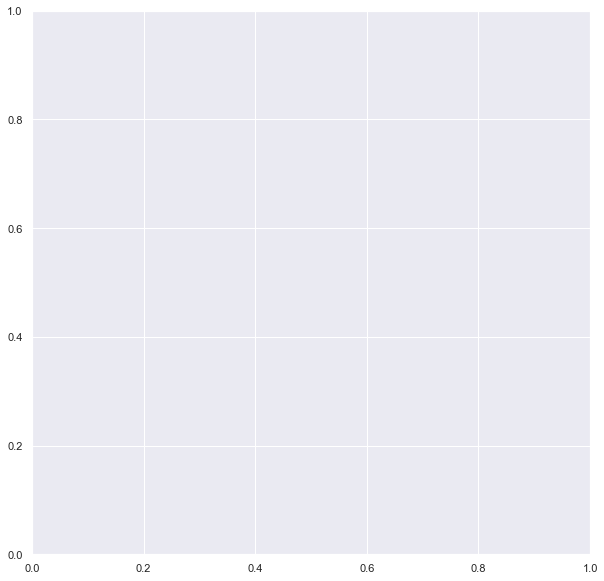

In [19]:
#generate figure 
y = months_total_profit_df.worldwide_gross
x = y.index

#need to calc the total profits of all movies in each month 

fig, ax = plt.subplots(figsize = (10,10))



In [20]:
ax.bar(x,y)

ax.set_title('Most Profitable Month to Premier')
#axes.set_xlabel('Month')
ax.set_ylabel('x $1,000,000,000');
ax.set_ylim(bottom=0, top=None, emit=True, auto=False, ymax=None)

(0.0, 40859495253.15)

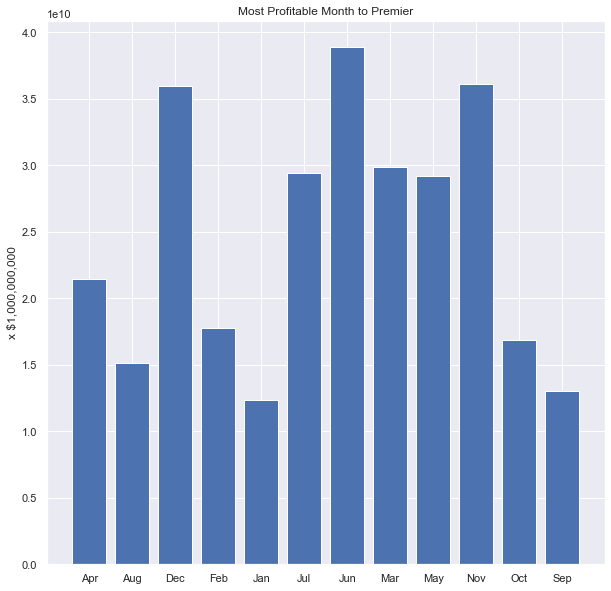

In [21]:
#Visualize most profitable month to Premier 

fig                                                              


In [32]:
days_total_profit = movie_df.groupby(by = 'release_day',axis = 0).worldwide_gross.sum()


In [33]:
days_total_profit_df= pd.DataFrame(days_total_profit)
#days_total_profit_df.head


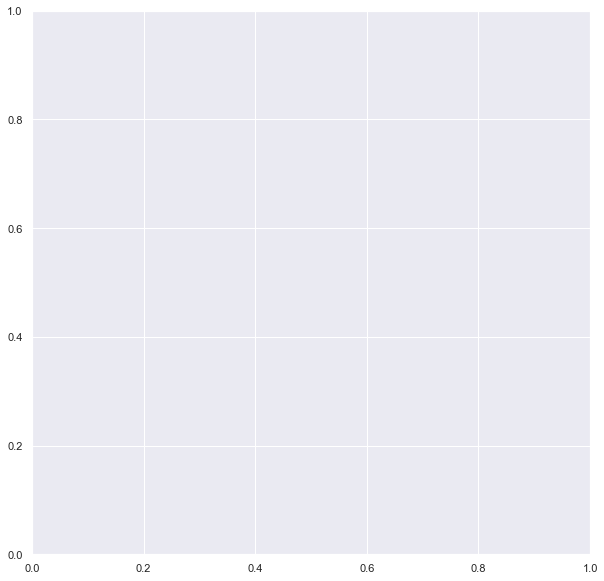

In [36]:
#Initialize graph 2
y2 = days_total_profit_df.worldwide_gross
x2 = y2.index

figure, axes = plt.subplots(figsize = (10,10))

In [37]:
#Find best day of the month to premier 

axes.bar(x2,y2)

axes.set_title('Most Profitable Day of the Month to Premier')
axes.set_xlabel('Days of the Month')
axes.set_ylabel('Profits');
axes.set_ylim(bottom=0, top=None, emit=True, auto=False, ymax=None)

(0.0, 18486622875.0)

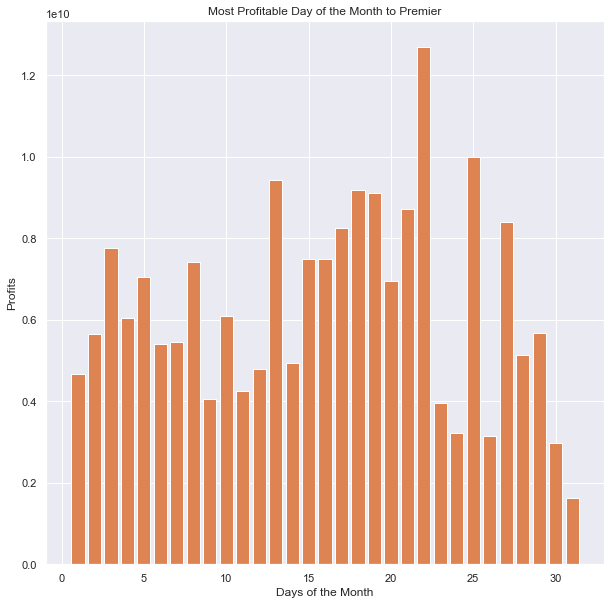

In [164]:
#Visualize most profitable month to Premier 

figure

In [ ]:
#June 22 is the best day to come out with a movie epsecially if that 
#lands on a friday 


In [ ]:
#want to find what genre does the best 


In [22]:
movie_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,release_month,release_day,release_year
0,0,0,0,tt0249516,Foodfight,91.0,"Action,Animation,Comedy",1.9,8248,26,45000000.0,0.0,73706.0,Dec,31,2012
1,1,1,1,tt0326592,The Overnight,88.0,NaN,7.5,24,21,200000.0,1109808.0,1165996.0,Jun,19,2015
2,2,2,2,tt3844362,The Overnight,79.0,"Comedy,Mystery",6.1,14828,21,200000.0,1109808.0,1165996.0,Jun,19,2015
3,3,3,3,tt0337692,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,17,25000000.0,720828.0,9313302.0,Mar,22,2013
4,4,4,4,tt4339118,On the Road,89.0,Drama,6.0,6,17,25000000.0,720828.0,9313302.0,Mar,22,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,2870,2870,2870,tt8680254,Richard III,NaN,Drama,9.1,28,65,9200000.0,2684904.0,4199334.0,Dec,29,1995
2871,2871,2871,2871,tt8824064,Heroes,88.0,Documentary,7.3,7,12,400000.0,655538.0,655538.0,Oct,24,2008
2872,2872,2872,2872,tt8976772,Push,92.0,Documentary,7.3,33,70,38000000.0,31811527.0,49678401.0,Feb,6,2009
2873,2873,2873,2873,tt9024106,Unplanned,106.0,"Biography,Drama",6.3,5945,33,6000000.0,18107621.0,18107621.0,Mar,29,2019
